# XML SoC descriptions


## gensoc

gensoc operates on XML description files and generates a  number of different formats from it:
* HDL peripheral instances and packages
* SVG register images
* Register reference tables

gensoc is deployed in the *MaSoCist* (**Ma**rtins **SoC** **i**nstancing and **s**ynthesis **t**oolchain) project to generate complex [SoC designs](https://section5.ch/index.php/soc-overview/) including a REST API for remote control from [netpp](https://section5.ch/index.php/netpp/) device description files. Examples are found in the [MaSoCist](https://github.com/hackfin/masocist) repository.

In [1]:
! sudo apt-get -y install gensoc xsltproc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libpython-stdlib libpython2-stdlib libpython2.7 libpython2.7-minimal
  libpython2.7-stdlib libxslt1.1 python python-backports.functools-lru-cache
  python-bs4 python-chardet python-html5lib python-lxml python-minimal
  python-pkg-resources python-six python-soupsieve python-webencodings python2
  python2-minimal python2.7 python2.7-minimal
Suggested packages:
  python-doc python-tk python-genshi python-lxml-dbg python-lxml-doc
  python-setuptools python2-doc python2.7-doc binfmt-support
The following NEW packages will be installed:
  gensoc libpython-stdlib libpython2-stdlib libpython2.7 libpython2.7-minimal
  libpython2.7-stdlib libxslt1.1 python python-backports.functools-lru-cache
  python-bs4 python-chardet python-html5lib python-lxml python-minimal
  python-pkg-resources python-six python-soupsieve python-webencodings python2
  pyth

Setting up python-lxml:amd64 (4.3.2-1) ...
Setting up gensoc (0.23-2) ...
Setting up python-pkg-resources (40.8.0-1) ...
Setting up python-six (1.12.0-1) ...
Setting up python-backports.functools-lru-cache (1.5-3) ...
Setting up python-chardet (3.0.4-3) ...
Setting up python-webencodings (0.5.1-1) ...
Setting up python-html5lib (1.0.1-1) ...
Setting up python-soupsieve (1.8+dfsg-1) ...
Setting up python-bs4 (4.7.1-1) ...
Processing triggers for libc-bin (2.28-10) ...
Processing triggers for mime-support (3.62) ...


Create an output directory first:

In [1]:
! [ -e output ] || mkdir output

## Generating register and bitfield schematics

Using xsltproc, a register graphics is generated from the XML SoC device description file.
Generate the SVG graphics for an entire register map:

In [2]:
! xsltproc -o output/tmp.svg --xinclude examples/xml/reg2svg.xsl examples/xml/registerlegend.xml

Then display it:

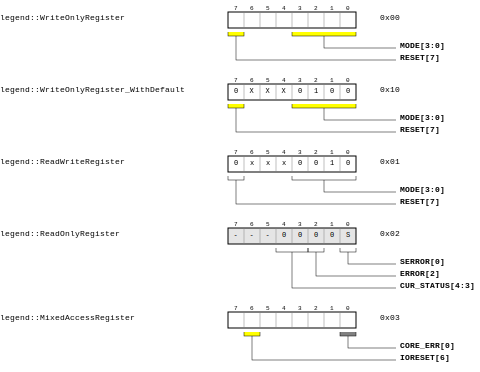

In [3]:
from IPython.display import SVG, display
#def show_svg():
svg = SVG(filename='output/tmp.svg')
display(svg)

### Generate register schematic for a specific register


In [4]:
! xsltproc -o output/reg.svg --stringparam register MixedAccessRegister --xinclude examples/xml/reg2svg.xsl examples/xml/registerlegend.xml

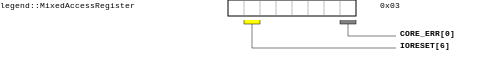

In [5]:
svg = SVG(filename='output/reg.svg')
display(svg)

## Generating a VHDL address decoder

The XML description file `examples/xml/beatrix.xml` contains a simple system on chip description of a register and peripheral map. It is used as central definition and source file to generate HDL and driver headers from.

Create an output working directory, if not existing:

In [6]:
! [ -e output ] || mkdir output

Generate the VHDL peripheral register map decoder:

In [7]:
! gensoc -o output/test \
        --decoder=sys --use-reset --interface-type=unsigned \
        examples/xml/beatrix.xml

Emitting output file output/test_sys_decode.vhdl


Download [output/test_sys_decode.vhdl](output/test_sys_decode.vhdl)

## Generating C headers

To access this register map from inside your SoC firmware, you might want to generate C headers:

In [8]:
! gensoc -o output/test \
        -r --interface-type=unsigned \
        examples/xml/beatrix.xml

Emitting output file output/test_register.h


We're gonna open it in the syntax-sensitive editor (note: not working within a Binder service, use `File->Open` instead): [test_register.h](/edit/work/hdlpg/output/test_register.h)